# Multiple Objectives for Residential PV

## Set up.

### One only needs to execute the following line once, in order to make sure recent enough packages are installed.

In [1]:
#!pip install 'numpy>=1.17.2' 'pandas>=0.25.1'

### Import packages.

In [2]:
import os
import sys
sys.path.insert(0, os.path.abspath("../../src"))

In [3]:
import numpy             as np
import matplotlib.pyplot as pl
import pandas            as pd
import seaborn           as sb

# The `tyche` package is located at <https://github.com/NREL/portfolio/tree/master/production-function/src/tyche/>.
import tyche             as ty

from copy            import deepcopy
from IPython.display import Image 

## Load data.

### The data are stored in a set of tab-separated value files in a folder.

In [4]:
designs = ty.Designs("data/pv_residential_simple")

In [5]:
investments = ty.Investments("data/pv_residential_simple")

### Compile the production and metric functions for each technology in the dataset.

In [6]:
designs.compile()

## Examine the data.

### The `functions` table specifies where the Python code for each technology resides.

In [7]:
designs.functions

,Style,Module,Capital,Fixed,Production,Metrics,Notes
Technology,,,,,,,
Residential PV,numpy,pv_residential_simple,capital_cost,fixed_cost,production,metrics,


Right now, only the style `numpy` is supported.

### The `indices` table defines the subscripts for variables.

In [8]:
designs.indices

Offset  \
Technology     Type    Index                 
Residential PV Capital BoS               2   
                       Inverter          1   
                       Module            0   
               Fixed   System            0   
               Input   NaN               0   
               Metric  GHG               2   
                       LCOE              0   
                       Labor             1   
               Output  Electricity       0   

                                                              Description  \
Technology     Type    Index                                                
Residential PV Capital BoS                              balance of system   
                       Inverter                          system inverters   
                       Module                               system module   
               Fixed   System                                whole system   
               Input   NaN                                      no inputs   
               Metric  GHG                              reduction in GHGs   
                       LCOE         reduction in levelized cost of energy   
                       Labor                increase in spending on wages   
               Output  Electricity                  electricity generated   

                                   Notes  
Technology     Type    Index              
Residential PV Capital BoS                
                       Inverter           
                       Module             
               Fixed   System             
               Input   NaN                
               Metric  GHG                
                       LCOE               
                       Labor              
               Output  Electricity

### The `designs` table contains the cost, input, efficiency, and price data for a scenario.

In [9]:
designs.designs

Value  \
Technology     Scenario             Variable          Index               
Residential PV 2015 Actual          Input             NaN             0   
                                    Input efficiency  NaN             1   
                                    Input price       NaN             0   
                                    Lifetime          BoS             1   
                                                      Inverter        1   
...                                                                 ...   
               Module Slow Progress Lifetime          Inverter        1   
                                                      Module          1   
                                    Output efficiency Electricity     1   
                                    Output price      Electricity     0   
                                    Scale             NaN             1   

                                                                             Units  \
Technology     Scenario             Variable          Index                          
Residential PV 2015 Actual          Input             NaN                        1   
                                    Input efficiency  NaN                        1   
                                    Input price       NaN                        1   
                                    Lifetime          BoS          system-lifetime   
                                                      Inverter     system-lifetime   
...                                                                            ...   
               Module Slow Progress Lifetime          Inverter     system-lifetime   
                                                      Module       system-lifetime   
                                    Output efficiency Electricity              W/W   
                                    Output price      Electricity            $/kWh   
                                    Scale             NaN            system/system   

                                                                                                             Notes  
Technology     Scenario             Variable          Index                                                         
Residential PV 2015 Actual          Input             NaN                                                no inputs  
                                    Input efficiency  NaN                                                no inputs  
                                    Input price       NaN                                                no inputs  
                                    Lifetime          BoS                                per-lifetime computations  
                                                      Inverter                           per-lifetime computations  
...                                                                                                            ...  
               Module Slow Progress Lifetime          Inverter                           per-lifetime computations  
                                                      Module                             per-lifetime computations  
                                    Output efficiency Electricity  see parameter table for individual efficiencies  
                                    Output price      Electricity                   not tracking electricity price  
                                    Scale             NaN                                               no scaling  

[90 rows x 3 columns]

### The `parameters` table contains additional techno-economic parameters for each technology.

In [10]:
designs.parameters

Offset  \
Technology     Scenario             Parameter                      
Residential PV 2015 Actual          Customer Acquisition      19   
                                    DC-to-AC Ratio            15   
                                    Direct Labor              17   
                                    Discount Rate              0   
                                    Hardware Capital          16   
...                                                          ...   
               Module Slow Progress Module Lifetime            4   
                                    Module O&M Fixed           7   
                                    Module Soiling Loss       10   
                                    Permitting                18   
                                    System Size                2   

                                                                                           Value  \
Technology     Scenario             Parameter                                                      
Residential PV 2015 Actual          Customer Acquisition     st.triang(0.5, loc=2000, scale=0.2)   
                                    DC-to-AC Ratio        st.triang(0.5, loc=1.4, scale=0.00014)   
                                    Direct Labor             st.triang(0.5, loc=2000, scale=0.2)   
                                    Discount Rate                                           0.07   
                                    Hardware Capital         st.triang(0.5, loc=80, scale=0.008)   
...                                                                                          ...   
               Module Slow Progress Module Lifetime              st.triang(0.5, loc=26, scale=1)   
                                    Module O&M Fixed           st.triang(0.5, loc=19, scale=0.5)   
                                    Module Soiling Loss   st.triang(0.5, loc=0.05, scale=10E-06)   
                                    Permitting               st.triang(0.5, loc=600, scale=0.06)   
                                    System Size                                               36   

                                                             Units Notes  
Technology     Scenario             Parameter                             
Residential PV 2015 Actual          Customer Acquisition  $/system   BCA  
                                    DC-to-AC Ratio               1   IDC  
                                    Direct Labor          $/system   BLR  
                                    Discount Rate           1/year    DR  
                                    Hardware Capital         $/m^2   BCC  
...                                                            ...   ...  
               Module Slow Progress Module Lifetime             yr   MLT  
                                    Module O&M Fixed        $/kWyr   MOM  
                                    Module Soiling Loss          1   MSL  
                                    Permitting            $/system   BPR  
                                    System Size                m^2   SSZ  

[210 rows x 4 columns]

### The `results` table specifies the units of measure for results of computations.

In [11]:
designs.results

Units Notes
Technology     Variable Index                            
Residential PV Cost     Cost               $/system      
               Metric   GHG          ŒîgCO2e/system      
                        LCOE                Œî$/kWh      
                        Labor            Œî$/system      
               Output   Electricity             kWh

### The `tranches` table specifies multually exclusive possibilities for investments: only one `Tranch` may be selected for each `Category`.

In [12]:
investments.tranches

Amount Notes
Category     Tranche             Scenario                                   
BoS R&D      BoS High R&D        BoS Fast Progress            900000.0      
             BoS Low R&D         BoS Slow Progress            300000.0      
             BoS Medium R&D      BoS Moderate Progress        600000.0      
Inverter R&D Inverter High R&D   Inverter Fast Progress      3000000.0      
             Inverter Low R&D    Inverter Slow Progress      1000000.0      
             Inverter Medium R&D Inverter Moderate Progress  2000000.0      
Module R&D   Module High R&D     Module Fast Progress        4500000.0      
             Module Low R&D      Module Slow Progress        1500000.0      
             Module Medium R&D   Module Moderate Progress    3000000.0

### The `investments` table bundles a consistent set of tranches (one per category) into an overall investment.

In [13]:
investments.investments

Notes
Investment Category     Tranche                  
High R&D   BoS R&D      BoS High R&D             
           Inverter R&D Inverter High R&D        
           Module R&D   Module High R&D          
Low R&D    BoS R&D      BoS Low R&D              
           Inverter R&D Inverter Low R&D         
           Module R&D   Module Low R&D           
Medium R&D BoS R&D      BoS Medium R&D           
           Inverter R&D Inverter Medium R&D      
           Module R&D   Module Medium R&D

## Evaluate the scenarios in the dataset.

In [14]:
scenario_results = designs.evaluate_scenarios(sample_count=50)

Evaluating Residential PV


/Users/tghosh/OneDrive - NREL/work_NREL/tyche/src/tyche/Designs.py:373: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  costs   = costs.append(  result.cost  )
/Users/tghosh/OneDrive - NREL/work_NREL/tyche/src/tyche/Designs.py:374: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outputs = outputs.append(result.output)
/Users/tghosh/OneDrive - NREL/work_NREL/tyche/src/tyche/Designs.py:375: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append(result.metric)
/Users/tghosh/OneDrive - NREL/work_NREL/tyche/src/tyche/Designs.py:388: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return organize("Cost", costs).append(
/Users/tghosh

In [15]:
scenario_results.xs(1, level="Sample", drop_level=False)

Value  \
Technology     Scenario                   Sample Variable Index                        
Residential PV 2015 Actual                1      Cost     Cost          19539.719760   
                                                 Metric   GHG              -0.006262   
                                                          LCOE             -0.000013   
                                                          Labor            -0.018047   
                                                 Output   Electricity  184097.008632   
               BoS Fast Progress          1      Cost     Cost          17566.185217   
                                                 Metric   GHG              -0.002708   
                                                          LCOE              0.010711   
                                                          Labor          -519.898656   
                                                 Output   Electricity  184104.923831   
               BoS Moderate Progress      1      Cost     Cost          17747.755635   
                                                 Metric   GHG              -0.002300   
                                                          LCOE              0.009725   
                                                          Labor          -373.630623   
                                                 Output   Electricity  184105.833073   
               BoS Slow Progress          1      Cost     Cost          19075.723224   
                                                 Metric   GHG               0.001200   
                                                          LCOE              0.002517   
                                                          Labor          -122.052338   
                                                 Output   Electricity  184113.627287   
               Inverter Fast Progress     1      Cost     Cost          17979.822747   
                                                 Metric   GHG               2.248053   
                                                          LCOE              0.011053   
                                                          Labor             0.057743   
                                                 Output   Electricity  189117.124142   
               Inverter Moderate Progress 1      Cost     Cost          18681.172257   
                                                 Metric   GHG               2.148330   
                                                          LCOE              0.007228   
                                                          Labor             0.004741   
                                                 Output   Electricity  188895.053237   
               Inverter Slow Progress     1      Cost     Cost          19261.675279   
                                                 Metric   GHG               2.498196   
                                                          LCOE              0.004574   
                                                          Labor             0.003274   
                                                 Output   Electricity  189674.165849   
               Module Fast Progress       1      Cost     Cost          18674.676440   
                                                 Metric   GHG              49.630716   
                                                          LCOE              0.042742   
                                                          Labor             0.067365   
                                                 Output   Electricity  294633.187091   
               Module Moderate Progress   1      Cost     Cost          18978.121764   
                                                 Metric   GHG              38.477150   
                                                          LCOE              0.035782   
                                                          Labor             0.061775   
                               

### Save results.

In [16]:
scenario_results.to_csv("output/residential_pv_multiobjective/example-scenario.csv")

### Plot GHG metric.

/var/folders/sm/spdh5zkx26v6vh_fk8w7p8456l6sp0/T/ipykernel_63886/3571693233.py:4: FutureWarning: Passing lists as key for xs is deprecated and will be removed in a future version. Pass key as a tuple instead.
  data=scenario_results.xs(


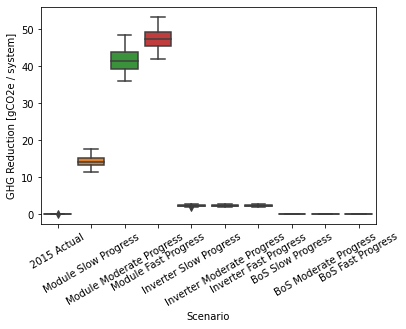

In [17]:
g = sb.boxplot(
    x="Scenario",
    y="Value",
    data=scenario_results.xs(
        ["Metric", "GHG"],
        level=["Variable", "Index"]
    ).reset_index()[["Scenario", "Value"]],
    order=[
        "2015 Actual"              ,
        "Module Slow Progress"      ,
        "Module Moderate Progress"  ,
        "Module Fast Progress"      ,
        "Inverter Slow Progress"    ,
        "Inverter Moderate Progress",
        "Inverter Fast Progress"    ,
        "BoS Slow Progress"         ,
        "BoS Moderate Progress"     ,
        "BoS Fast Progress"         ,
    ]
)
g.set(ylabel="GHG Reduction [gCO2e / system]")
g.set_xticklabels(g.get_xticklabels(), rotation=30);

### Plot LCOE metric.

/var/folders/sm/spdh5zkx26v6vh_fk8w7p8456l6sp0/T/ipykernel_63886/4054109034.py:4: FutureWarning: Passing lists as key for xs is deprecated and will be removed in a future version. Pass key as a tuple instead.
  data=scenario_results.xs(


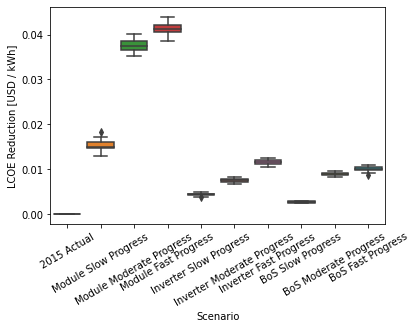

In [18]:
g = sb.boxplot(
    x="Scenario",
    y="Value",
    data=scenario_results.xs(
        ["Metric", "LCOE"],
        level=["Variable", "Index"]
    ).reset_index()[["Scenario", "Value"]],
    order=[
        "2015 Actual"              ,
        "Module Slow Progress"      ,
        "Module Moderate Progress"  ,
        "Module Fast Progress"      ,
        "Inverter Slow Progress"    ,
        "Inverter Moderate Progress",
        "Inverter Fast Progress"    ,
        "BoS Slow Progress"         ,
        "BoS Moderate Progress"     ,
        "BoS Fast Progress"         ,
    ]
)
g.set(ylabel="LCOE Reduction [USD / kWh]")
g.set_xticklabels(g.get_xticklabels(), rotation=30);

### Plot labor metric.

/var/folders/sm/spdh5zkx26v6vh_fk8w7p8456l6sp0/T/ipykernel_63886/3798028221.py:4: FutureWarning: Passing lists as key for xs is deprecated and will be removed in a future version. Pass key as a tuple instead.
  data=scenario_results.xs(


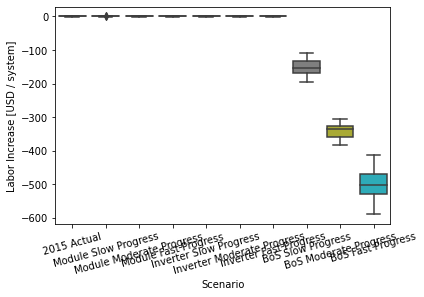

In [19]:
g = sb.boxplot(
    x="Scenario",
    y="Value",
    data=scenario_results.xs(
        ["Metric", "Labor"],
        level=["Variable", "Index"]
    ).reset_index()[["Scenario", "Value"]],
    order=[
        "2015 Actual"              ,
        "Module Slow Progress"      ,
        "Module Moderate Progress"  ,
        "Module Fast Progress"      ,
        "Inverter Slow Progress"    ,
        "Inverter Moderate Progress",
        "Inverter Fast Progress"    ,
        "BoS Slow Progress"         ,
        "BoS Moderate Progress"     ,
        "BoS Fast Progress"         ,
    ]
)
g.set(ylabel="Labor Increase [USD / system]")
g.set_xticklabels(g.get_xticklabels(), rotation=15);

## Evaluate the investments in the dataset.

In [20]:
investment_results = investments.evaluate_investments(designs, sample_count=50)

Evaluating Residential PV


/Users/tghosh/OneDrive - NREL/work_NREL/tyche/src/tyche/Investments.py:118: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  amounts = self.investments.drop(
/Users/tghosh/OneDrive - NREL/work_NREL/tyche/src/tyche/Designs.py:373: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  costs   = costs.append(  result.cost  )
/Users/tghosh/OneDrive - NREL/work_NREL/tyche/src/tyche/Designs.py:374: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outputs = outputs.append(result.output)
/Users/tghosh/OneDrive - NREL/work_NREL/tyche/src/tyche/Designs.py:375: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.

### Costs of investments.

In [21]:
investment_results.amounts

,Amount
Investment,
High R&D,8400000.0
Low R&D,2800000.0
Medium R&D,5600000.0


### Benefits of investments.

In [22]:
investment_results.metrics.xs(1, level="Sample", drop_level=False)

Value  \
Investment Category     Tranche             Scenario                   Sample Technology     Index               
High R&D   BoS R&D      BoS High R&D        BoS Fast Progress          1      Residential PV GHG     -0.008609   
                                                                                             LCOE     0.010172   
                                                                                             Labor -483.639527   
Medium R&D BoS R&D      BoS Medium R&D      BoS Moderate Progress      1      Residential PV GHG      0.001879   
                                                                                             LCOE     0.008989   
                                                                                             Labor -339.430573   
Low R&D    BoS R&D      BoS Low R&D         BoS Slow Progress          1      Residential PV GHG      0.003402   
                                                                                             LCOE     0.003033   
                                                                                             Labor -168.983879   
High R&D   Inverter R&D Inverter High R&D   Inverter Fast Progress     1      Residential PV GHG      2.005124   
                                                                                             LCOE     0.011460   
                                                                                             Labor   -0.071486   
Medium R&D Inverter R&D Inverter Medium R&D Inverter Moderate Progress 1      Residential PV GHG      2.098611   
                                                                                             LCOE     0.006680   
                                                                                             Labor   -0.011718   
Low R&D    Inverter R&D Inverter Low R&D    Inverter Slow Progress     1      Residential PV GHG      2.326958   
                                                                                             LCOE     0.004582   
                                                                                             Labor    0.009798   
High R&D   Module R&D   Module High R&D     Module Fast Progress       1      Residential PV GHG     45.674983   
                                                                                             LCOE     0.041247   
                                                                                             Labor    0.089234   
Medium R&D Module R&D   Module Medium R&D   Module Moderate Progress   1      Residential PV GHG     40.606529   
                                                                                             LCOE     0.037056   
                                                                                             Labor    0.055278   
Low R&D    Module R&D   Module Low R&D      Module Slow Progress       1      Residential PV GHG     14.814250   
                                                                                             LCOE     0.015796   
                                                                                             Labor    0.098662   

                                                                                                             Units  
Investment Category     Tranche             Scenario                   Sample Technology     Index                  
High R&D   BoS R&D      BoS High R&D        BoS Fast Progress          1      Residential PV GHG    ŒîgCO2e/system  
                                                                                             LCOE          Œî$/kWh  
                                                                                             Labor      Œî$/system  
Medium R&D BoS R&D      BoS Medium R&D      BoS Moderate Progress      1      Residential PV GHG    ŒîgCO2e/system  
                                                                                             LCO

In [23]:
investment_results.summary.xs(1, level="Sample", drop_level=False)

Value           Units
Investment Technology     Sample Index                            
High R&D   Residential PV 1      GHG     47.671498  ŒîgCO2e/system
                                 LCOE     0.062879         Œî$/kWh
                                 Labor -483.621779      Œî$/system
Medium R&D Residential PV 1      GHG     42.707019  ŒîgCO2e/system
                                 LCOE     0.052725         Œî$/kWh
                                 Labor -339.387013      Œî$/system
Low R&D    Residential PV 1      GHG     17.144611  ŒîgCO2e/system
                                 LCOE     0.023411         Œî$/kWh
                                 Labor -168.875419      Œî$/system

### Save results.

In [24]:
investment_results.amounts.to_csv("output/residential_pv_multiobjective/example-investment-amounts.csv")

In [25]:
investment_results.metrics.to_csv("output/residential_pv_multiobjective/example-investment-metrics.csv")

### Plot GHG metric.

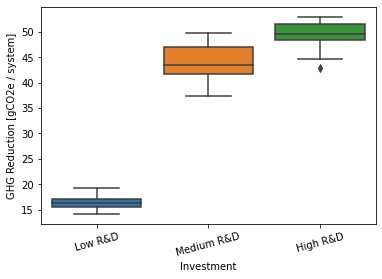

In [26]:
g = sb.boxplot(
    x="Investment",
    y="Value",
    data=investment_results.metrics.xs(
        "GHG",
        level="Index"
    ).groupby(["Investment", "Sample"]).aggregate(np.sum).reset_index()[["Investment", "Value"]],
    order=[
        "Low R&D"   ,
        "Medium R&D",
        "High R&D"  ,
    ]
)
g.set(ylabel="GHG Reduction [gCO2e / system]")
g.set_xticklabels(g.get_xticklabels(), rotation=15);

### Plot LCOE metric.

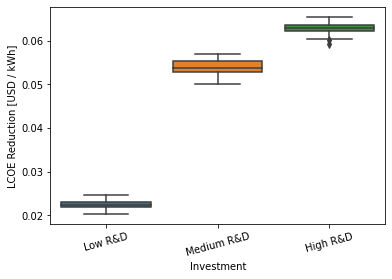

In [27]:
g = sb.boxplot(
    x="Investment",
    y="Value",
    data=investment_results.metrics.xs(
        "LCOE",
        level="Index"
    ).groupby(["Investment", "Sample"]).aggregate(np.sum).reset_index()[["Investment", "Value"]],
    order=[
        "Low R&D"   ,
        "Medium R&D",
        "High R&D"  ,
    ]
)
g.set(ylabel="LCOE Reduction [USD / kWh]")
g.set_xticklabels(g.get_xticklabels(), rotation=15);

### Plot labor metric.

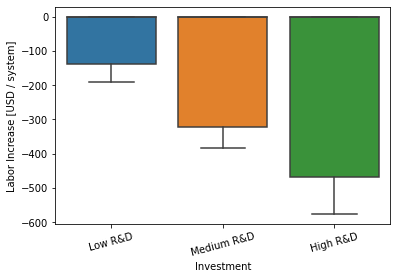

In [28]:
g = sb.boxplot(
    x="Investment",
    y="Value",
    data=investment_results.metrics.xs(
        "Labor",
        level="Index"
    ).reset_index()[["Investment", "Value"]],
    order=[
        "Low R&D"   ,
        "Medium R&D",
        "High R&D"  ,
    ]
)
g.set(ylabel="Labor Increase [USD / system]")
g.set_xticklabels(g.get_xticklabels(), rotation=15);

## Multi-objective decision analysis.

### Compute costs and metrics for tranches.

Tranches are atomic units for building investment portfolios. Evaluate all of the tranches, so we can assemble them into investments (portfolios).

In [29]:
tranche_results = investments.evaluate_tranches(designs, sample_count=50)

Evaluating Residential PV


/Users/tghosh/OneDrive - NREL/work_NREL/tyche/src/tyche/Investments.py:81: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  amounts = self.tranches.drop(
/Users/tghosh/OneDrive - NREL/work_NREL/tyche/src/tyche/Designs.py:373: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  costs   = costs.append(  result.cost  )
/Users/tghosh/OneDrive - NREL/work_NREL/tyche/src/tyche/Designs.py:374: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outputs = outputs.append(result.output)
/Users/tghosh/OneDrive - NREL/work_NREL/tyche/src/tyche/Designs.py:375: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

Display the cost of each tranche.

In [30]:
tranche_results.amounts

Amount
Category     Tranche                       
BoS R&D      BoS High R&D          900000.0
             BoS Low R&D           300000.0
             BoS Medium R&D        600000.0
Inverter R&D Inverter High R&D    3000000.0
             Inverter Low R&D     1000000.0
             Inverter Medium R&D  2000000.0
Module R&D   Module High R&D      4500000.0
             Module Low R&D       1500000.0
             Module Medium R&D    3000000.0

Display the metrics for each tranche.

In [31]:
tranche_results.summary

Value  \
Category   Technology     Tranche        Sample Index               
BoS R&D    Residential PV BoS High R&D   1      GHG     -0.006205   
                                                LCOE     0.010037   
                                                Labor -527.605564   
                                         2      GHG     -0.003649   
                                                LCOE     0.009445   
...                                                           ...   
Module R&D Residential PV Module Low R&D 49     LCOE     0.015069   
                                                Labor    0.023076   
                                         50     GHG     14.762456   
                                                LCOE     0.016277   
                                                Labor    0.033977   

                                                                Units  
Category   Technology     Tranche        Sample Index                  
BoS R&D    Residential PV BoS High R&D   1      GHG    ŒîgCO2e/system  
                                                LCOE          Œî$/kWh  
                                                Labor      Œî$/system  
                                         2      GHG    ŒîgCO2e/system  
                                                LCOE          Œî$/kWh  
...                                                               ...  
Module R&D Residential PV Module Low R&D 49     LCOE          Œî$/kWh  
                                                Labor      Œî$/system  
                                         50     GHG    ŒîgCO2e/system  
                                                LCOE          Œî$/kWh  
                                                Labor      Œî$/system  

[1350 rows x 2 columns]

Save the results.

In [32]:
tranche_results.amounts.to_csv("output/example-tranche-amounts.csv")
tranche_results.summary.to_csv("output/example-tranche-summary.csv")

### Fit a response surface to the results.

The response surface interpolates between the discrete set of cases provided in the expert elicitation. This allows us to study funding levels intermediate between those scenarios.

In [33]:
evaluator = ty.Evaluator(investments.tranches, tranche_results.summary)

Here are the categories of investment and the maximum amount that could be invested in each:

In [34]:
evaluator.max_amount

,Amount
Category,
BoS R&D,900000.0
Inverter R&D,3000000.0
Module R&D,4500000.0


Here are the metrics and their units of measure:

In [35]:
evaluator.units

,Units
Index,
GHG,ŒîgCO2e/system
LCOE,Œî$/kWh
Labor,Œî$/system


#### Example interpolation.

Let's evaluate the case where each category is invested in at half of its maximum amount.

In [36]:
example_investments = evaluator.max_amount / 2
example_investments

,Amount
Category,
BoS R&D,450000.0
Inverter R&D,1500000.0
Module R&D,2250000.0


In [37]:
evaluator.evaluate(example_investments)

Category    Index  Sample
BoS R&D     GHG    1          -0.004056939437447227
                   2          -0.005095908614499933
                   3          -0.006271897518892899
                   4         -0.0030359196572078417
                   5          -0.007485127245999479
                                      ...          
Module R&D  Labor  46         -0.012587119442173389
                   47          -0.02305866677602353
                   48            0.1052070867887096
                   49           0.02648156684801961
                   50          0.025996512183155573
Name: Value, Length: 450, dtype: object

Let's evaluate the mean instead of outputing the whole distribution.

In [38]:
evaluator.evaluate_statistic(example_investments, np.mean)

Index
GHG       29.971211
LCOE       0.038168
Labor   -246.887261
Name: Value, dtype: float64

Here is the standard deviation:

In [39]:
evaluator.evaluate_statistic(example_investments, np.std)

Index
GHG       1.642069
LCOE      0.000962
Labor    13.674328
Name: Value, dtype: float64

A risk-averse decision maker might be interested in the 10% percentile:

In [40]:
evaluator.evaluate_statistic(example_investments, lambda x: np.quantile(x, 0.1))

Index
GHG       27.552746
LCOE       0.036971
Labor   -263.371322
Name: Value, dtype: float64

### ε-Constraint multiobjective optimization

In [41]:
optimizer = ty.EpsilonConstraintOptimizer(evaluator)

In order to meaningfully map the decision space, we need to know the maximum values for each of the metrics.

#### Example optimization.

Limit spending to $3M.

In [42]:
investment_max = 3e6

Require that the GHG reduction be at least 40 gCO2e/system and that the Labor wages not decrease.

In [43]:
metric_min = pd.Series([40, 0], name = "Value", index = ["GHG", "Labor"])
metric_min

GHG      40
Labor     0
Name: Value, dtype: int64

Compute the ε-constrained maximum for the LCOE.

In [44]:
optimum = optimizer.opt_slsqp(
    "LCOE"                       ,
    sense = 'max',
    total_amount = investment_max,
    statistic    = np.mean       ,
)
optimum.exit_message

'Optimization terminated successfully'

Here are the optimal spending levels:

In [45]:
np.round(optimum.amounts)

Category
BoS R&D          600000.0
Inverter R&D          0.0
Module R&D      2400000.0
Name: Amount, dtype: float64

Here are the three metrics at that optimum:

In [46]:
optimum.metrics

Index
GHG       32.493671
LCOE       0.038792
Labor   -341.681632
Name: Value, dtype: object

*Thus, by putting all of the investment into Module R&D, we can expected to achieve a mean 3.75 ¢/kWh reduction in LCOE under the GHG and Labor constraints.*

It turns out that there is no solution for these constraints if we evaluate the 10th percentile of the metrics, for a risk-averse decision maker.

In [47]:
optimum = optimizer.opt_slsqp(
    "LCOE"                       ,
    sense = 'max',
    total_amount = investment_max,
    statistic    = lambda x: np.quantile(x, 0.1),
)
optimum.exit_message

/Users/tghosh/OneDrive - NREL/work_NREL/tyche/src/tyche/Evaluator.py:112: FutureWarning: Dropping invalid columns in DataFrameGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the function.
  interpolators1 = self.raw.groupby(


'Optimization terminated successfully'

Let's try again, but with a less stringent set of constraints, only constraining GHG somewhat  but not Labor at all.

In [48]:
optimum = optimizer.opt_slsqp(
    "LCOE"                                                         ,
    total_amount = investment_max                                  ,
    statistic    = lambda x: np.quantile(x, 0.1)                   ,
)
optimum.exit_message

opt_slsqp: No optimization sense specified; maximizing objective function


/Users/tghosh/OneDrive - NREL/work_NREL/tyche/src/tyche/Evaluator.py:112: FutureWarning: Dropping invalid columns in DataFrameGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the function.
  interpolators1 = self.raw.groupby(


'Optimization terminated successfully'

In [49]:
np.round(optimum.amounts)

Category
BoS R&D          600000.0
Inverter R&D          0.0
Module R&D      2400000.0
Name: Amount, dtype: float64

In [50]:
optimum.metrics

Index
GHG       29.992824
LCOE       0.037125
Labor   -367.357025
Name: Value, dtype: object

### Example MILP optimization

This formulation converts the original non-linear optimization into a piecewise linear, mixed-integer optimization, and then attempts to solve the same problem.

As written, the MILP formulation is infeasible.

In [51]:
investment_max = 3e6
metric_min = pd.Series([40, 0], name = "Value", index = ["GHG", "Labor"])

optimum = optimizer.opt_milp(
    "LCOE"                       ,
    total_amount = investment_max,
    statistic    = np.mean       ,
)

optimum.exit_message

opt_milp: No optimization sense provided; Maximizing objective


/Users/tghosh/OneDrive - NREL/work_NREL/tyche/src/tyche/EpsilonConstraints.py:1050: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  y = pd.Series(None, name="Value",


<OptimizationStatus.OPTIMAL: 0>

Let's determine if the problem is truly infeasible or if the solver is failing by examining the underlying data.

In [52]:
_wide = evaluator.evaluate_corners_wide(np.mean).reset_index()
_wide

Index,BoS R&D,Inverter R&D,Module R&D,GHG,LCOE,Labor
0,300000.0,1000000.0,1500000.0,16.686316,0.022698,-152.121494
1,300000.0,1000000.0,3000000.0,43.171579,0.044370,-152.123235
2,300000.0,1000000.0,4500000.0,49.507504,0.048428,-152.128663
3,300000.0,2000000.0,1500000.0,16.770483,0.025787,-152.106785
4,300000.0,2000000.0,3000000.0,43.255746,0.047459,-152.108526
5,300000.0,2000000.0,4500000.0,49.591671,0.051517,-152.113954
6,300000.0,3000000.0,1500000.0,16.752229,0.029786,-152.117661
7,300000.0,3000000.0,3000000.0,43.237493,0.051459,-152.119402
8,300000.0,3000000.0,4500000.0,49.573418,0.055516,-152.124830
9,600000.0,1000000.0,1500000.0,16.686676,0.028877,-341.665996


Add a column to the above data with the total investment amount.

In [53]:
_wide['total R&D'] = _wide.loc[:,'BoS R&D'] + _wide.loc[:, 'Inverter R&D'] + _wide.loc[:, 'Module R&D']
_wide

Index,BoS R&D,Inverter R&D,Module R&D,GHG,LCOE,Labor,total R&D
0,300000.0,1000000.0,1500000.0,16.686316,0.022698,-152.121494,2800000.0
1,300000.0,1000000.0,3000000.0,43.171579,0.044370,-152.123235,4300000.0
2,300000.0,1000000.0,4500000.0,49.507504,0.048428,-152.128663,5800000.0
3,300000.0,2000000.0,1500000.0,16.770483,0.025787,-152.106785,3800000.0
4,300000.0,2000000.0,3000000.0,43.255746,0.047459,-152.108526,5300000.0
5,300000.0,2000000.0,4500000.0,49.591671,0.051517,-152.113954,6800000.0
6,300000.0,3000000.0,1500000.0,16.752229,0.029786,-152.117661,4800000.0
7,300000.0,3000000.0,3000000.0,43.237493,0.051459,-152.119402,6300000.0
8,300000.0,3000000.0,4500000.0,49.573418,0.055516,-152.124830,7800000.0
9,600000.0,1000000.0,1500000.0,16.686676,0.028877,-341.665996,3100000.0


Look for entries that meet the total investment constraint of less than $3 MM.

In [54]:
_wide.loc[_wide['total R&D'] <= 3e6,:]

Index,BoS R&D,Inverter R&D,Module R&D,GHG,LCOE,Labor,total R&D
0,300000.0,1000000.0,1500000.0,16.686316,0.022698,-152.121494,2800000.0


This entry does not meet the GHG constraint, which is why the MILP formulation is infeasible.

To find a feasible solution, data points that include investments of $0 need to be included in the above dataset. Currently the tranches for this formulation only include non-zero investments:

In [55]:
tranche_results.amounts

Amount
Category     Tranche                       
BoS R&D      BoS High R&D          900000.0
             BoS Low R&D           300000.0
             BoS Medium R&D        600000.0
Inverter R&D Inverter High R&D    3000000.0
             Inverter Low R&D     1000000.0
             Inverter Medium R&D  2000000.0
Module R&D   Module High R&D      4500000.0
             Module Low R&D       1500000.0
             Module Medium R&D    3000000.0